In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import os 
import cv2 # For reading the image
import skimage.io 
import matplotlib.pylab    as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline  
# This will display the image inside the notebook

In [2]:
from natsort import natsorted

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
# Specify the image resolution
rows = 256
cols = 256
tems = 20

In [4]:
images = np.load('images.npy')
print images.shape
images = np.complex64(images)
images = images[0:2,:,:,:] # Take the first 2 slices

(150, 20, 256, 256)


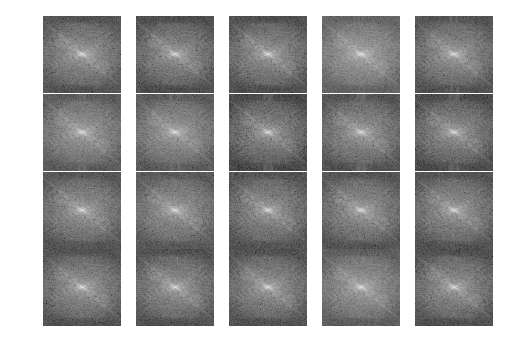

In [5]:
data = tf.placeholder(tf.complex64)
#freq = tf.placeholder(tf.complex)
freq = tf.fft2d(data)

with tf.Session() as sess:
    result = sess.run(freq, feed_dict={data: images})

mag = np.log(np.abs(result))
for i in range(20):
    plt.subplot(4,5,i+1) # Index of subplot is +1
    plt.axis('off')
    plt.imshow(np.fft.fftshift(mag[0,i,:,:], axes=(0,1)))
    
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.01)

(2, 20, 256, 256)
complex64
(2, 20, 256, 256)
complex64


True

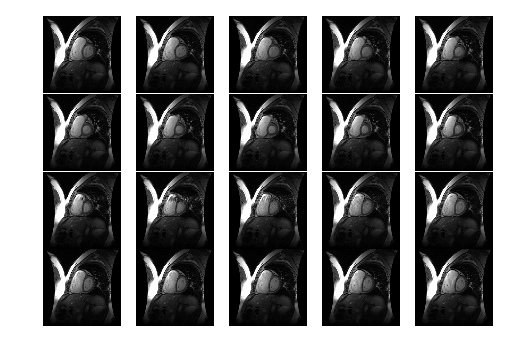

In [6]:
# Test of inverse Fourier transform follows by forward Fourier transform
data = tf.placeholder(tf.complex64)
freq = tf.fft2d(data)
ifft = tf.ifft2d(freq)

with tf.Session() as sess:
    result = sess.run(ifft, feed_dict={data: images[0:2,:,:,:]})

mag = np.complex64(np.abs(result))
print images.shape
print images.dtype
print mag.shape
print mag.dtype
for i in range(20):
    plt.subplot(4,5,i+1) # Index of subplot is +1
    plt.axis('off')
    plt.imshow( np.real(mag[0,i,:,:]))
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.01)

#check the result is close
np.allclose(mag, np.abs(images), rtol=1e-08, atol=1e-04)
